<a href="https://colab.research.google.com/github/MPramodhkumar/Analyze-Daily-Weather-Data/blob/main/Analyze_Daily_Weather_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Load the Data
df = pd.read_csv('weather.csv')

In [4]:
# Data Exploration
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [6]:
print(df.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

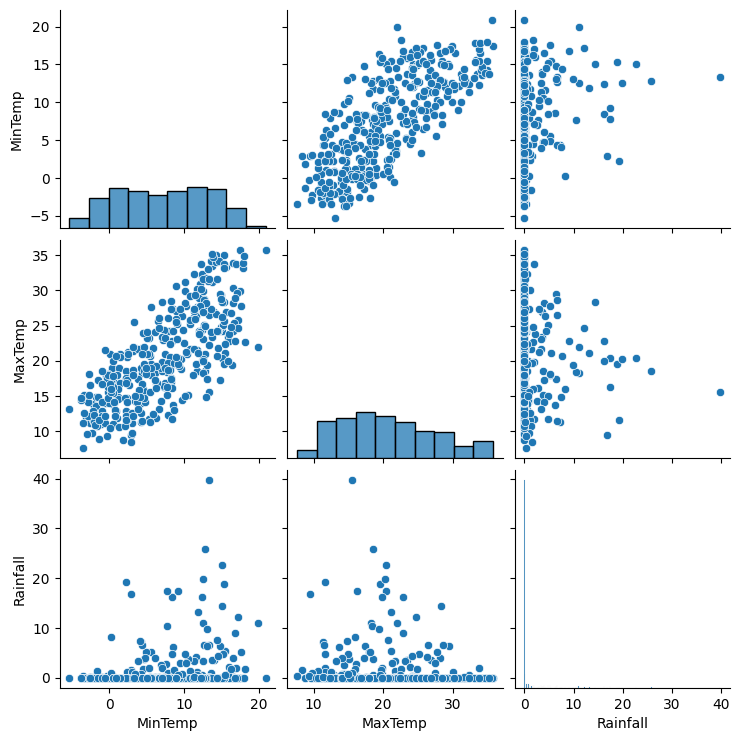

In [7]:
# Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [9]:
print(df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


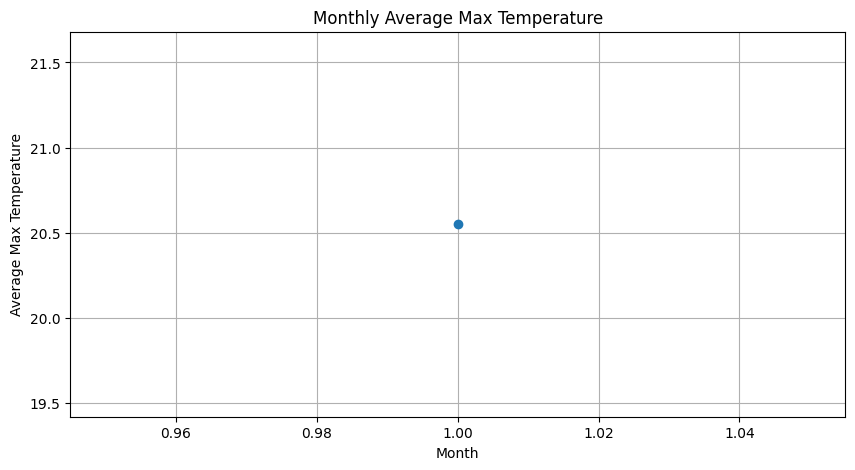

Mean Squared Error for Rainfall Prediction: 37.0768456005826
Highest rainfall month: 1, Lowest rainfall month: 1


In [10]:
# Data Analysis
df['Month'] = pd.to_datetime(df.index).month  # Extract month from the index
monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()

# Data Visualization (Part 2)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

# Advanced Analysis (predict Rainfall)
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

# Conclusions and Insights
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')


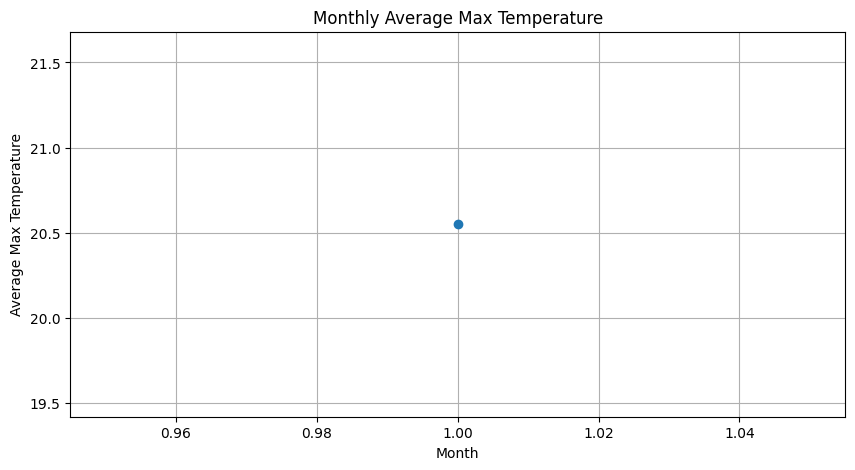

In [11]:
# Data Visualization (Part 2)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

In [12]:
# Advanced Analysis (predict Rainfall)
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.0768456005826


In [13]:
# Conclusions and Insights
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')

Highest rainfall month: 1, Lowest rainfall month: 1
